Task 2 : Model Selection with Cross Validation - Balancing Bias and Variance

M.Sc.DSBDA (RAHUL SANATAN BEHARA)

1. Download the dataset: Dataset

In [ ]:
#importing important library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# for categorical variable encoding
from sklearn import preprocessing
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

2.Load the dataset into the tool.

In [ ]:
#Loading Dataset
df=pd.read_csv("/content/penguins_size (1).csv")
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
#Data Shape
#useful to get the basic information about data
df.shape

(344, 7)

The dataset has 344 rows
The dataset has 7 columns

In [ ]:
#Top five data
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


3. Perform Below Visualizations.

● Univariate Analysis
● Bi- Variate Analysis
● Multi-Variate Analysis

Univariate Analysis

In [ ]:
Species=df['species'].value_counts()
Species

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

<Axes: xlabel='species', ylabel='count'>

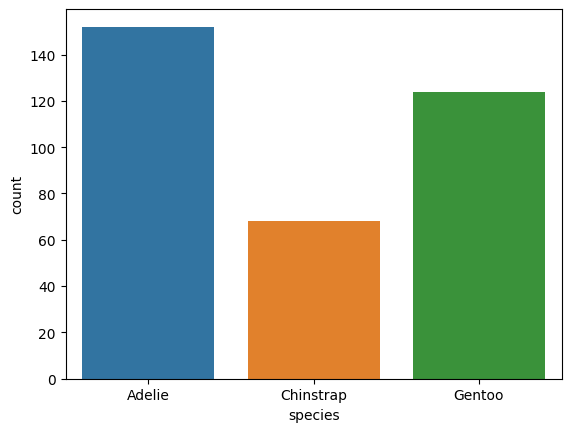

In [ ]:
sns.countplot(x='species',data=df,hue='species')

([<matplotlib.patches.Wedge at 0x78afa4cf4400>,
 [Text(0.19980052901159365, 1.0817022458175296, 'Adelie'),
  Text(-0.7918938277833127, -0.7634816078457249, 'Gentoo'),
  Text(0.894618705053837, -0.6400448207491378, 'Chinstrap')],
 [Text(0.10898210673359653, 0.5900194068095616, '44.2%'),
  Text(-0.4319420878818069, -0.4164445133703954, '36.0%'),
  Text(0.4879738391202747, -0.34911535677225697, '19.8%')])

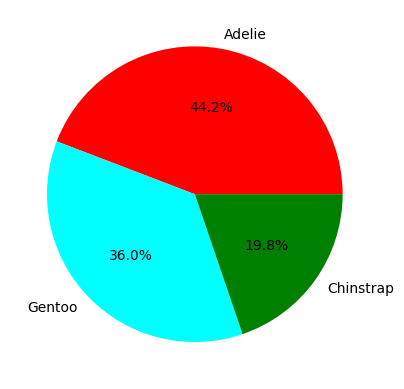

In [ ]:
import matplotlib.pyplot as plt
plt.pie(Species.values, labels=Species.index, autopct="%.1f%%", colors=['red', 'aqua', 'green'])

<Axes: xlabel='island', ylabel='count'>

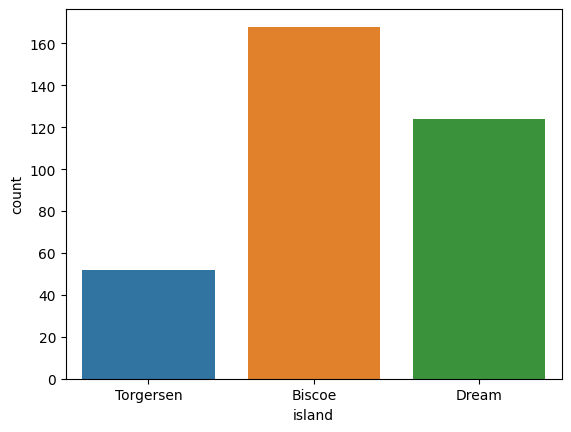

In [ ]:
sns.countplot(x='island',data=df,hue='island')

<Axes: xlabel='sex', ylabel='count'>

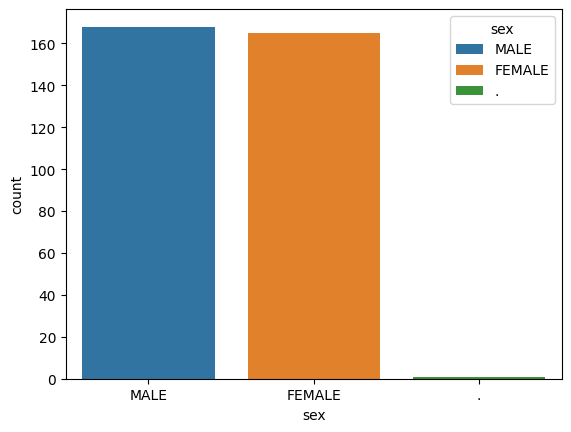

In [ ]:
sns.countplot(data=df,x='sex', hue='sex')

Text(0, 0.5, 'count of readings')

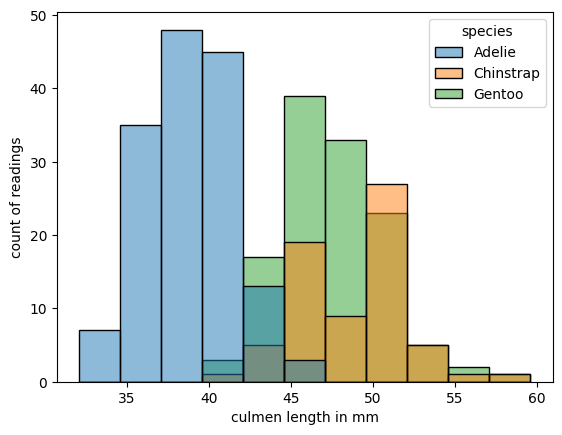

In [ ]:
sns.histplot(data=df,x='culmen_length_mm',hue='species')
plt.xlabel("culmen length in mm")
plt.ylabel("count of readings")

Text(0, 0.5, 'count of readings')

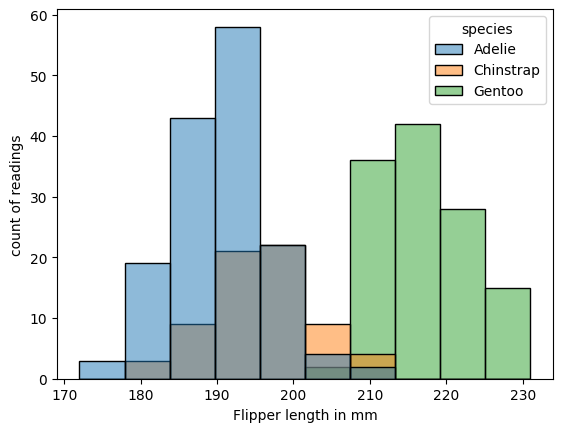

In [ ]:
sns.histplot(data=df,x='flipper_length_mm',hue='species')
plt.xlabel("Flipper length in mm")
plt.ylabel("count of readings")

Text(0, 0.5, 'count of readings')

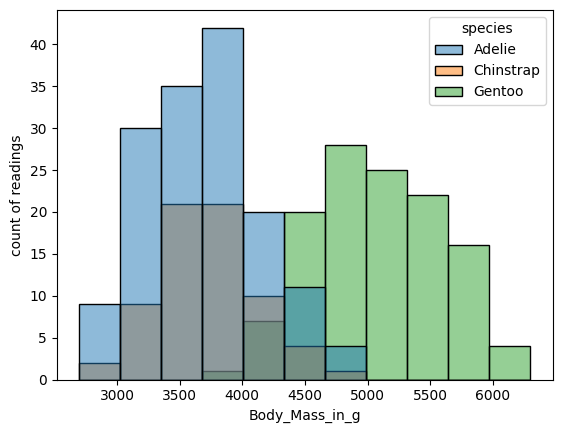

In [ ]:
sns.histplot(data=df,x='body_mass_g',hue='species')
plt.xlabel("Body_Mass_in_g")
plt.ylabel("count of readings")

Text(0, 0.5, 'Body mass in grams')

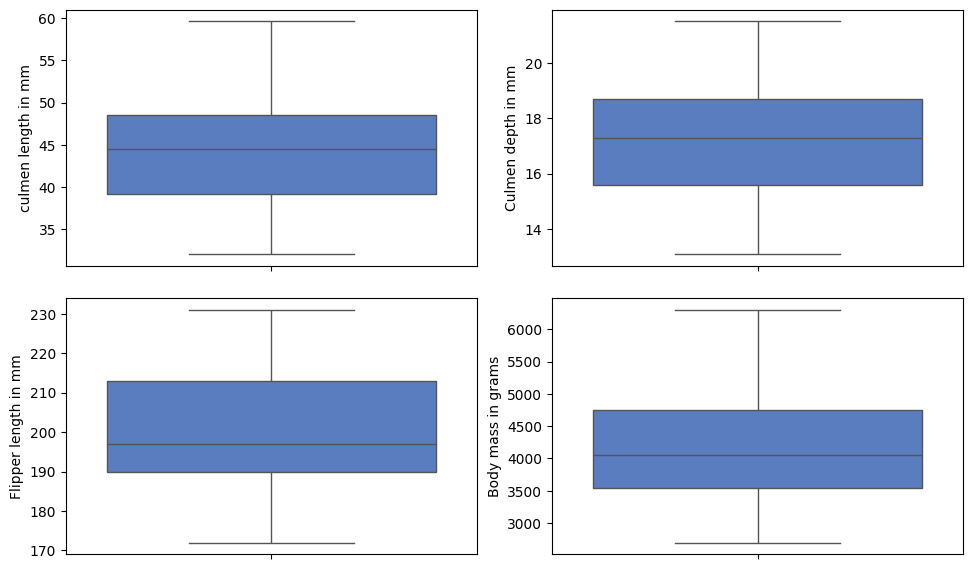

In [ ]:
sns.set_palette('muted')
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.boxplot(data=df,y='culmen_length_mm')
plt.ylabel("culmen length in mm")
plt.subplot(2,2,2)
sns.boxplot(data=df,y='culmen_depth_mm')
plt.ylabel("Culmen depth in mm")
plt.tight_layout(pad=2.0)
plt.subplot(2,2,3)
sns.boxplot(data=df,y='flipper_length_mm')
plt.ylabel("Flipper length in mm")
plt.subplot(2,2,4)
sns.boxplot(data=df,y='body_mass_g')
plt.ylabel("Body mass in grams")

Bi- Variate Analysis

Text(0, 0.5, 'Culmen length in mm')

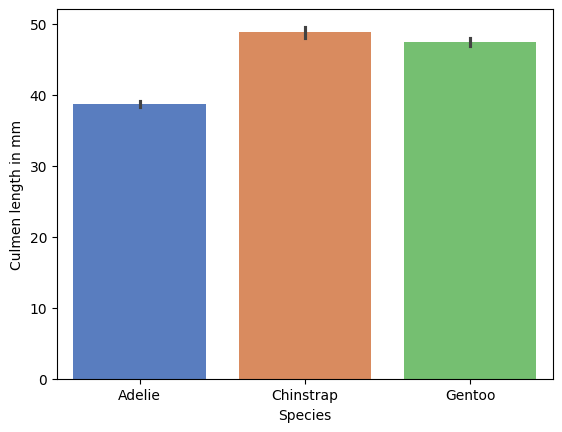

In [ ]:
#Bi- Variate Analysis
sns.barplot(data=df,x='species',y='culmen_length_mm',hue='species')
plt.xlabel("Species")
plt.ylabel("Culmen length in mm")

Text(0, 0.5, 'Body mass in grams')

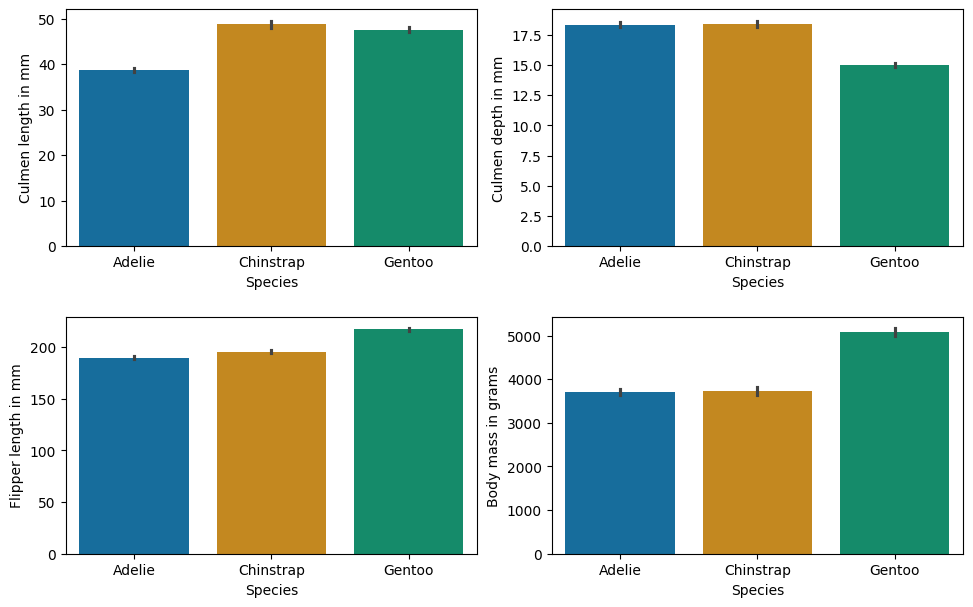

In [ ]:
sns.set_palette('colorblind')
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.barplot(data=df,x='species',y='culmen_length_mm',hue='species')
plt.xlabel("Species")
plt.ylabel("Culmen length in mm")
plt.subplot(2,2,2)
sns.barplot(data=df,x='species',y='culmen_depth_mm',hue='species')
plt.xlabel("Species")
plt.ylabel("Culmen depth in mm")
plt.tight_layout(pad=2.0)
plt.subplot(2,2,3)
sns.barplot(data=df,x='species',y='flipper_length_mm',hue='species')
plt.xlabel("Species")
plt.ylabel("Flipper length in mm")
plt.subplot(2,2,4)
sns.barplot(data=df,x='species',y='body_mass_g',hue='species')
plt.xlabel("Species")
plt.ylabel("Body mass in grams")

Text(0, 0.5, 'body mass in grams')

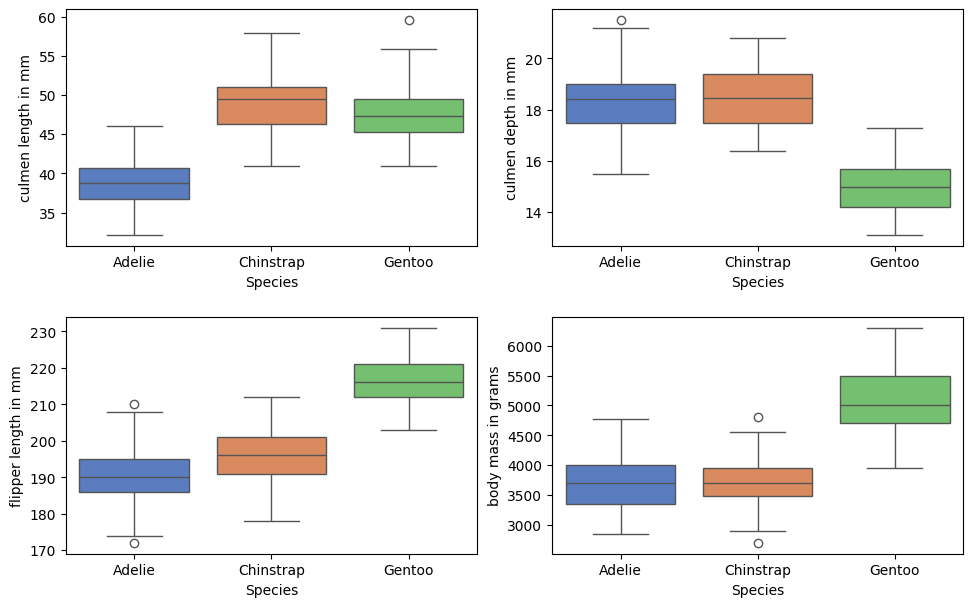

In [ ]:
sns.set_palette('muted')
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.boxplot(data=df,x='species',y='culmen_length_mm',hue='species')
plt.xlabel("Species")
plt.ylabel("culmen length in mm")
plt.subplot(2,2,2)
sns.boxplot(data=df,x='species',y='culmen_depth_mm',hue='species')
plt.xlabel("Species")
plt.ylabel("culmen depth in mm")
plt.tight_layout(pad=2.0)
plt.subplot(2,2,3)
sns.boxplot(data=df,x='species',y='flipper_length_mm',hue='species')
plt.xlabel("Species")
plt.ylabel("flipper length in mm")
plt.subplot(2,2,4)
sns.boxplot(data=df,x='species',y='body_mass_g',hue='species')
plt.xlabel("Species")
plt.ylabel("body mass in grams")

Multi-Variate Analysis

In [ ]:
#Multi-Variate Analysis
c=df.corr()
c

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


<Axes: >

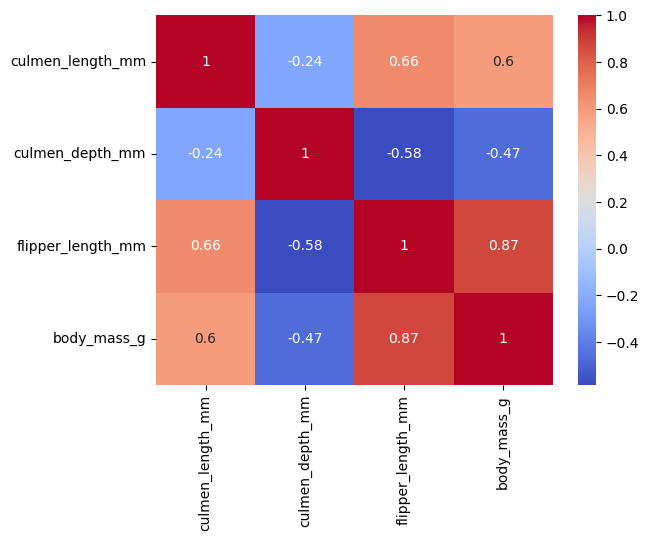

In [ ]:
sns.heatmap(c,cmap='coolwarm', annot=True)

4.Descriptive Statistics

In [ ]:
#Descriptive Statistics
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


5. Check for Missing values and deal with them.


In [ ]:
#Missing Values search...
missing_df =df.isnull().sum().to_frame("Missing values in number")
missing_df

,Missing values in number
species,0
island,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,10


Dataset contain missing values namely culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g,and sex

<Axes: >

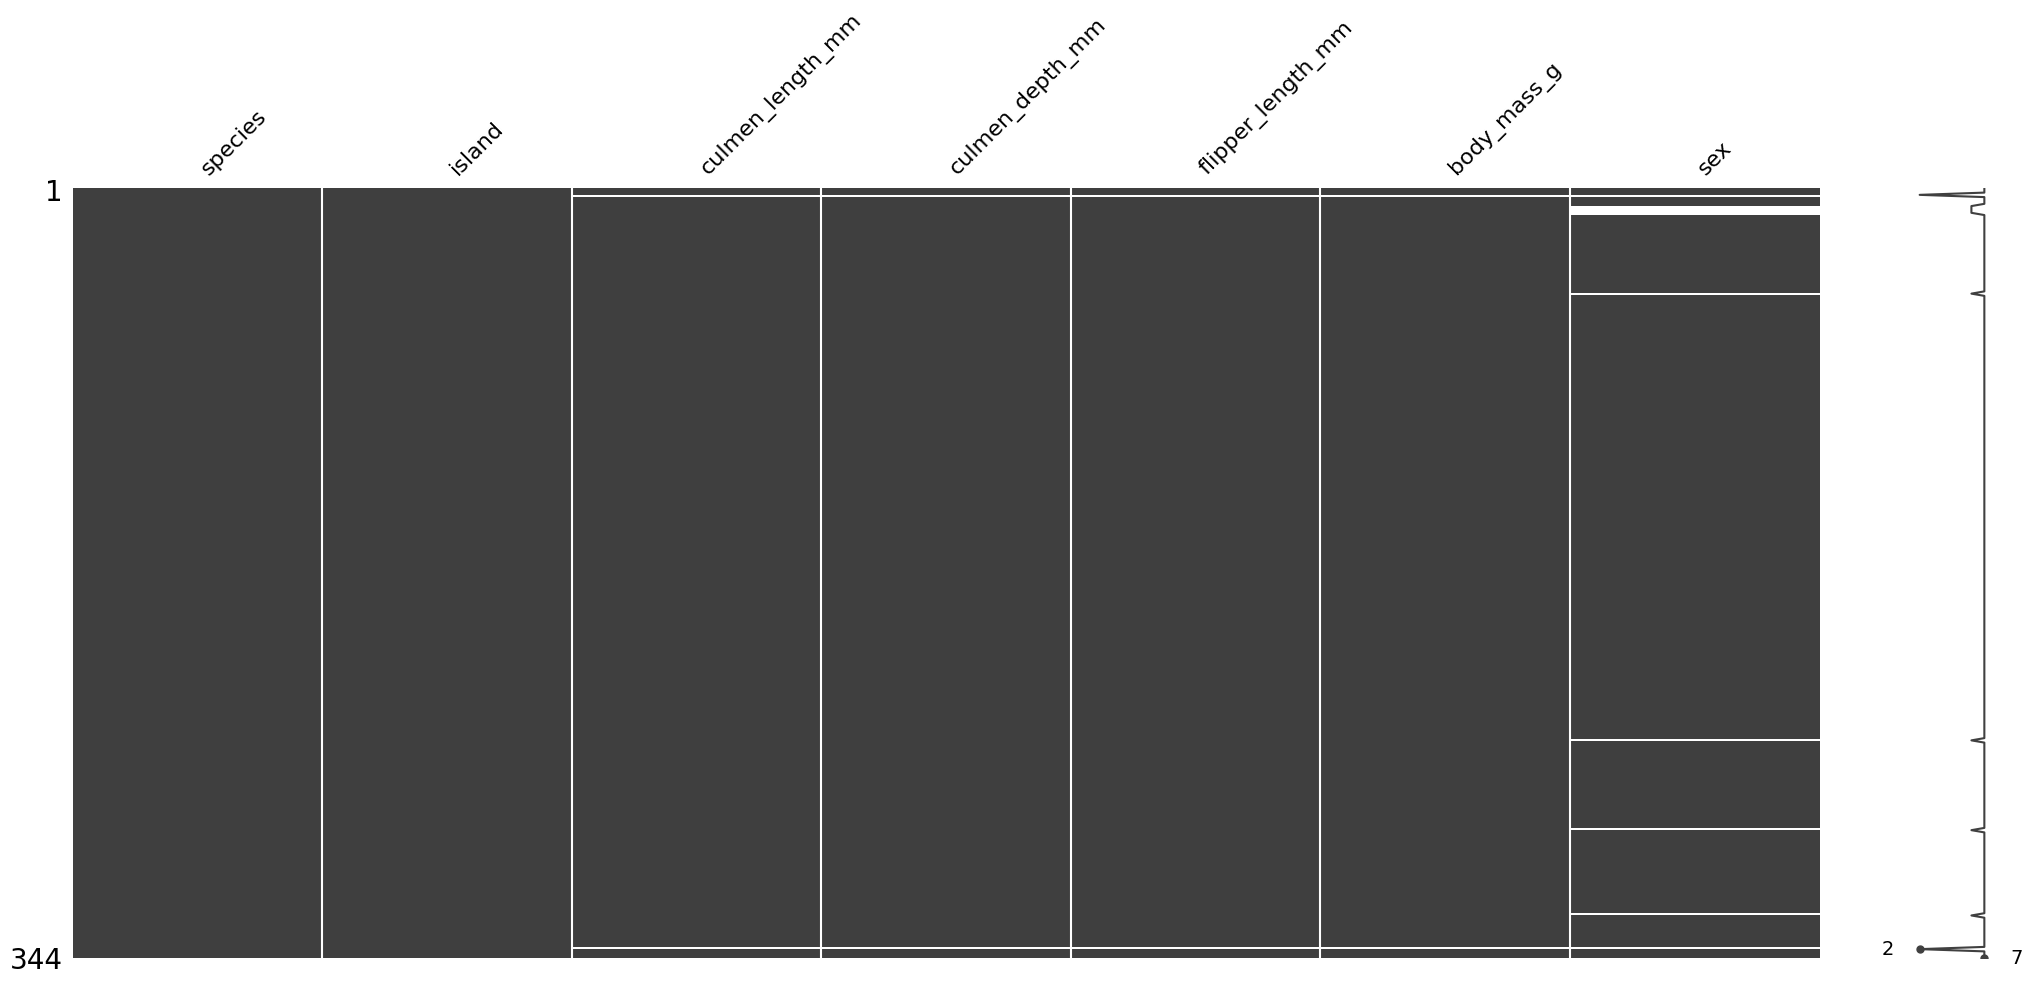

In [ ]:
# Visualize missing values as a matrix
import missingno as msno
msno.matrix(df)

From the above visual,
It is clear that the percentage of missing values is quite low in the data

In [ ]:
#Replacing the NA values with mean values of particular columns
def func(df,coln):
  df[f'{coln}'].fillna(df[f'{coln}'].mean(),inplace = True)

func(df,'culmen_depth_mm')
func(df,'culmen_length_mm')
func(df,'body_mass_g')
func(df,'flipper_length_mm')
#Replacing the sex column by mode.
df['sex'].fillna(df['sex'].mode()[0],inplace = True)

In [ ]:
df.isnull().sum().to_frame('Missing Values in No.')

,Missing Values in No.
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


In [ ]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

Output shows that the third unique value in sex feature is a "." which is a redundant value so thats needs to be removed from the column

In [ ]:
df.drop(df[df['sex'] == '.'].index, inplace = True)

In [ ]:
df['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

The sex feature is cleaned now!

6. Find the outliers and replace them outliers

Text(0, 0.5, 'Body mass in grams')

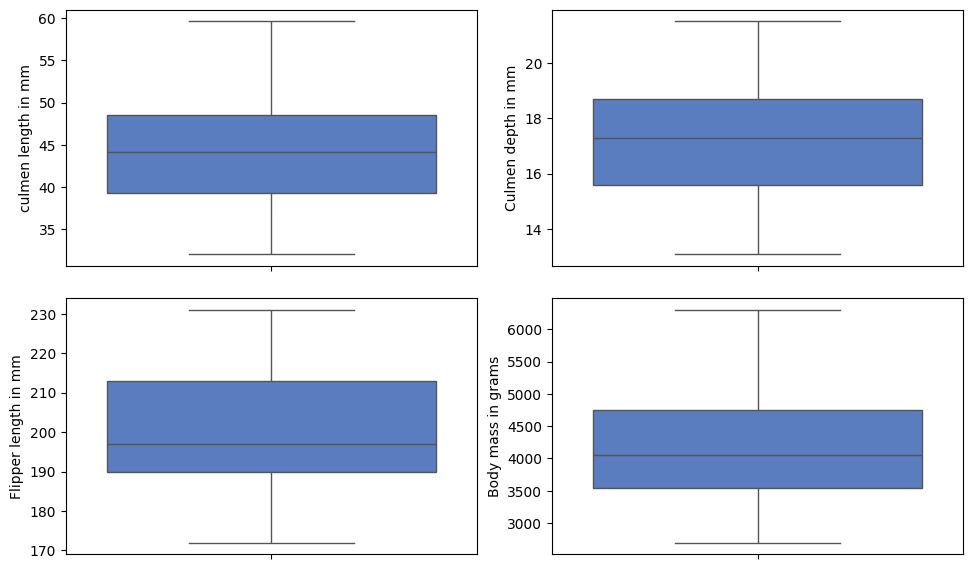

In [ ]:
#Find the outliers and replace them outliers
sns.set_palette('muted')
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.boxplot(data=df,y='culmen_length_mm')
plt.ylabel("culmen length in mm")
plt.subplot(2,2,2)
sns.boxplot(data=df,y='culmen_depth_mm')
plt.ylabel("Culmen depth in mm")
plt.tight_layout(pad=2.0)
plt.subplot(2,2,3)
sns.boxplot(data=df,y='flipper_length_mm')
plt.ylabel("Flipper length in mm")
plt.subplot(2,2,4)
sns.boxplot(data=df,y='body_mass_g')
plt.ylabel("Body mass in grams")

7. Check for Categorical columns and perform encoding.

In [ ]:
#Check for Categorical columns and perform encoding.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            343 non-null    object 
 1   island             343 non-null    object 
 2   culmen_length_mm   343 non-null    float64
 3   culmen_depth_mm    343 non-null    float64
 4   flipper_length_mm  343 non-null    float64
 5   body_mass_g        343 non-null    float64
 6   sex                343 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


We can see that there are 4 numerical and 3 categorical attributes

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df['species']=le.fit_transform(df['species'])
df['island']=le.fit_transform(df['island'])
df['sex']=le.fit_transform(df['sex'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            343 non-null    int64  
 1   island             343 non-null    int64  
 2   culmen_length_mm   343 non-null    float64
 3   culmen_depth_mm    343 non-null    float64
 4   flipper_length_mm  343 non-null    float64
 5   body_mass_g        343 non-null    float64
 6   sex                343 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.4 KB


8. Split the data into dependent and independent variables.

In [ ]:
x=df.iloc[:,1:6]
x.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,2,39.10000,18.70000,181.000000,3750.000000
1,2,39.50000,17.40000,186.000000,3800.000000
2,2,40.30000,18.00000,195.000000,3250.000000
3,2,43.92193,17.15117,200.915205,4201.754386
4,2,36.70000,19.30000,193.000000,3450.000000


In [ ]:

y=df.iloc[:,:1]
y.head()

,species
0,0
1,0
2,0
3,0
4,0


9. Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.84097639, -0.88549593,  0.78507169, -1.4198086 , -0.56309543],
       [ 1.84097639, -0.81201451,  0.12432233, -1.06250378, -0.50050028],
       [ 1.84097639, -0.66505169,  0.42928357, -0.41935511, -1.18904695],
       ...,
       [-0.9164686 ,  1.19035396, -0.73973453,  1.51009092,  1.94071064],
       [-0.9164686 ,  0.2350956 , -1.1971764 ,  0.79548128,  1.25216397],
       [-0.9164686 ,  1.09850219, -0.53642704,  0.86694225,  1.50254458]])

10.Split the data into training and testing.

In [ ]:
#Split the data into training and testing.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

11.Build the Model


In [ ]:
#Build the Model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

12.Train the Model

In [ ]:
#Train the Model
r=Ridge()
l=Lasso()
dt=DecisionTreeClassifier(criterion='entropy',random_state=0)
rf=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
K_Nb= KNeighborsClassifier()

In [ ]:
l.fit(x_train,y_train)

Lasso()

In [ ]:
r.fit(x_train,y_train)

Ridge()

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
K_Nb.fit(x_train,y_train)

KNeighborsClassifier()

13. Test the Model



In [ ]:
#Test the Model
Model1=l.predict(x_test)
Model2=r.predict(x_test)
Model3=dt.predict(x_test)
Model4=rf.predict(x_test)
Model5=K_Nb.predict(x_test)

In [ ]:
print(Model1)
print(Model2)
print(Model3)
print(Model4)
print(Model5)

[0.95416667 0.95416667 0.95416667 0.95416667 0.95416667 0.95416667
 0.95416667 0.95416667 0.95416667 0.95416667 0.95416667 0.95416667
 0.95416667 0.95416667 0.95416667 0.95416667 0.95416667 0.95416667
 0.95416667 0.95416667 0.95416667 0.95416667 0.95416667 0.95416667
 0.95416667 0.95416667 0.95416667 0.95416667 0.95416667 0.95416667
 0.95416667 0.95416667 0.95416667 0.95416667 0.95416667 0.95416667
 0.95416667 0.95416667 0.95416667 0.95416667 0.95416667 0.95416667
 0.95416667 0.95416667 0.95416667 0.95416667 0.95416667 0.95416667
 0.95416667 0.95416667 0.95416667 0.95416667 0.95416667 0.95416667
 0.95416667 0.95416667 0.95416667 0.95416667 0.95416667 0.95416667
 0.95416667 0.95416667 0.95416667 0.95416667 0.95416667 0.95416667
 0.95416667 0.95416667 0.95416667 0.95416667 0.95416667 0.95416667
 0.95416667 0.95416667 0.95416667 0.95416667 0.95416667 0.95416667
 0.95416667 0.95416667 0.95416667 0.95416667 0.95416667 0.95416667
 0.95416667 0.95416667 0.95416667 0.95416667 0.95416667 0.9541

14.Measure the performance using Evaluation Metrics.

In [ ]:
#Measure the performance using Evaluation Metrics.
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,classification_report

In [ ]:
print(f"\nfor Lasso Model \nMSE={mean_squared_error(y_test,Model1)} \nR2_score={r2_score(y_test,Model1)}")
print(f"\nfor Ridge Model \nMSE={mean_squared_error(y_test,Model2)} \nR2_score={r2_score(y_test,Model2)}")
print(f"\nfor Decision Tree Model \naccuracy score={accuracy_score(y_test,Model3)} \nR2_score={r2_score(y_test,Model3)}")
print(f"\nfor Random Forest Model \naccuracy score={accuracy_score(y_test,Model4)} \nR2_score={r2_score(y_test,Model4)}")
print(f"\nfor K N N Model \naccuracy score={accuracy_score(y_test,Model5)} \nMSE={mean_squared_error(y_test,Model5)} \nR2_score={r2_score(y_test,Model5)}")


for Lasso Model 
MSE=0.8016152575512404 
R2_score=-0.021173903381497494

for Ridge Model 
MSE=0.05594954638819039 
R2_score=0.9287261362112977

for Decision Tree Model 
accuracy score=1.0 
R2_score=1.0

for Random Forest Model 
accuracy score=0.9902912621359223 
R2_score=0.9876320845341018

for K N N Model 
accuracy score=1.0 
MSE=0.0 
R2_score=1.0


In [ ]:
# For SVM
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
model20 = svm.SVC()
model20.fit(x_train,y_train)

SVC()

In [ ]:
pred_3=model20.predict(x_test)

In [ ]:
accuracy3 = accuracy_score(y_test, pred_3)
precision3 = precision_score(y_test, pred_3,average='macro')
recall3 = recall_score(y_test, pred_3,average='macro')
f13 = f1_score(y_test, pred_3, average='macro')

In [ ]:
print("Model_3 Using SVM")
print("Accuracy:",accuracy3)
print("Precision:", precision3)
print("Recall:", recall3)
print("F1-score:", f13)

Model_3 Using SVM
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [ ]:
#Cross Validation
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.svm import SVC

In [ ]:
s_scores=cross_val_score(SVC(), x, y, cv=4)
s_scores

array([1.        , 0.96511628, 1.        , 0.98823529])

In [ ]:
print(x)

[[ 1.84097639 -0.88549593  0.78507169 -1.4198086  -0.56309543]
 [ 1.84097639 -0.81201451  0.12432233 -1.06250378 -0.50050028]
 [ 1.84097639 -0.66505169  0.42928357 -0.41935511 -1.18904695]
 ...
 [-0.9164686   1.19035396 -0.73973453  1.51009092  1.94071064]
 [-0.9164686   0.2350956  -1.1971764   0.79548128  1.25216397]
 [-0.9164686   1.09850219 -0.53642704  0.86694225  1.50254458]]


In [ ]:
np.average(s_scores)

0.9883378932968536

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
d_scores=cross_val_score(DecisionTreeClassifier(), x, y, cv=4)
d_scores

array([1.        , 0.93023256, 0.95348837, 0.96470588])

In [ ]:
np.average(d_scores)

0.9621067031463748

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k_scores=cross_val_score(KNeighborsClassifier(), x, y, cv=4)
np.average(k_scores)

0.9824555403556772

In [ ]:
#Decision Tree
print(f"\nfor Decision Tree Model \naccuracy score={accuracy_score(y_test,Model3)} \nR2_score={r2_score(y_test,Model3)}")
print('After K Fold CV')
np.average(d_scores)


for Decision Tree Model 
accuracy score=1.0 
R2_score=1.0
After K Fold CV


0.9621067031463748

In [ ]:
# K N N
print(f"\nfor K N N Model \naccuracy score={accuracy_score(y_test,Model5)} \nMSE={mean_squared_error(y_test,Model5)} \nR2_score={r2_score(y_test,Model5)}")
print('After K Fold CV')
np.average(k_scores)


for K N N Model 
accuracy score=1.0 
MSE=0.0 
R2_score=1.0
After K Fold CV


0.9824555403556772

In [ ]:
# S V M
print("Model_3 Using SVM")
print("Accuracy:",accuracy3)
print("Precision:", precision3)
print("Recall:", recall3)
print("F1-score:", f13)
print('After K Fold CV')
np.average(s_scores)

Model_3 Using SVM
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
After K Fold CV


0.9883378932968536

Conclusion:
I got three model with 100 accuracy rate,
are as follows before K Fold CV_ Decision Tree Model, K Nearest Neighbours, Support Vector Machine

for Decision Tree Model,
After K Fold CV
**0.9620725034199726**

For K N N Model,
After K Fold CV
**0.9824555403556772**

For S V M,
After K Fold CV
**0.9883378932968536**

here we find that after cross validation using k fold, the most accuarte and best fit model is **SVM** with 0.9883 Accuracy.